In [1]:
import os, json, pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from util import deep_update_dict
from env import ActionOffsetLunarLander, collect_trajectories
from algorithms import NoOffsetDDPG, NaiveDDPG, OffsetMLPDDPG, PearlDDPG, SimplifiedPearlDDPG

In [3]:
with open("manually_saved_runs/no_offset_ddpg_4/config.json") as fp:
    config = json.load(fp)
no_offset = NoOffsetDDPG(config, load_dir="manually_saved_runs/no_offset_ddpg_4")

with open("manually_saved_runs/naive_ddpg_4/config.json") as fp:
    config = json.load(fp)
naive = NaiveDDPG(config, load_dir="manually_saved_runs/naive_ddpg_4")

with open("manually_saved_runs/no_offset_ddpg_4/config.json") as fp:
    config = json.load(fp)
offset_mlp = OffsetMLPDDPG(config, load_dir="manually_saved_runs/no_offset_ddpg_4",
                            offset_net_path="notebooks/output/sas_to_offset_MLP_4_with_1_offset_bestval.pt", prior=False)

with open("manually_saved_runs/no_offset_ddpg_4/config.json") as fp:
    config = json.load(fp)
offset_mlp_naive = OffsetMLPDDPG(config, load_dir="manually_saved_runs/naive_ddpg_4",
                            offset_net_path="notebooks/output/sas_to_offset_MLP_4_with_1_offset_bestval.pt", prior=False)

with open("manually_saved_runs/no_offset_ddpg_4/config.json") as fp:
    config = json.load(fp)
offset_mlp_prior = OffsetMLPDDPG(config, load_dir="manually_saved_runs/no_offset_ddpg_4",
                            offset_net_path="notebooks/output/sas_to_offset_MLP_4_with_1_offset_bestval.pt", prior=True)

with open("manually_saved_runs/no_offset_ddpg_4/config.json") as fp:
    config = json.load(fp)
offset_mlp_prior_naive = OffsetMLPDDPG(config, load_dir="manually_saved_runs/naive_ddpg_4",
                            offset_net_path="notebooks/output/sas_to_offset_MLP_4_with_1_offset_bestval.pt", prior=True)

with open("manually_saved_runs/simplified_pearl_ddpg_3/config.json") as fp:
    config = json.load(fp)
simplified_pearl = SimplifiedPearlDDPG(config, load_dir="manually_saved_runs/simplified_pearl_ddpg_3")

with open("config/pearl_ddpg.json") as fp:
    temp_config = json.load(fp)
with open("manually_saved_runs/pearl_ddpg_3/config.json") as fp:
    config = json.load(fp)
config = deep_update_dict(config, temp_config)
pearl = PearlDDPG(config, load_dir="manually_saved_runs/pearl_ddpg_3")

In [4]:
min_engine_power = 0
env = ActionOffsetLunarLander(min_engine_power)

In [5]:
max_action_offset = 1.0
num_tasks = 21
num_episodes = 100

def task_returns_and_lengths(trainer, action_dim):
    task_params = np.zeros((num_tasks, 2))
    task_params[:, action_dim] = np.linspace(-max_action_offset, max_action_offset, num_tasks)
    
    task_trajs, _, _ = collect_trajectories(env, trainer.current_policy(), task_params, num_episodes, eval=True)

    print(f"finished dim {action_dim}")
    
    return {
        "returns": [np.mean([sum(traj.rewards) for traj in trajs]) for trajs in task_trajs],
        "lengths": [np.mean([len(traj) for traj in trajs]) for trajs in task_trajs]
    }

### Get data for line plots

In [6]:
returns_and_lengths = {}

In [7]:
returns_and_lengths.update({
    "No Offset": [
        task_returns_and_lengths(no_offset, 0),
        task_returns_and_lengths(no_offset, 1)
    ],
    "Naive": [
        task_returns_and_lengths(naive, 0),
        task_returns_and_lengths(naive, 1)
    ],
    # "Offset Correction MLP": [
    #     task_returns_and_lengths(offset_mlp, 0),
    #     task_returns_and_lengths(offset_mlp, 1)
    # ],
    "Offset Correction MLP (Prior)": [
        task_returns_and_lengths(offset_mlp_prior, 0),
        task_returns_and_lengths(offset_mlp_prior, 1)
    ],
    # "Offset Correction MLP (Naive)": [
    #     task_returns_and_lengths(offset_mlp_naive, 0),
    #     task_returns_and_lengths(offset_mlp_naive, 1)
    # ],
    # "Offset Correction MLP (Prior)(Naive)": [
    #     task_returns_and_lengths(offset_mlp_prior_naive, 0),
    #     task_returns_and_lengths(offset_mlp_prior_naive, 1)
    # ],
    # "Simplified PEARL": [
    #     task_returns_and_lengths(simplified_pearl, 0),
    #     task_returns_and_lengths(simplified_pearl, 1)
    # ],
    # "PEARL": [
    #     task_returns_and_lengths(pearl, 0),
    #     task_returns_and_lengths(pearl, 1)
    # ],
})

finished dim 0
finished dim 1
finished dim 0
finished dim 1
finished dim 0
finished dim 1


In [11]:
# Ben ran RL^2 on the cloud
returns_and_lengths.update({
    'rl2': [{'returns': [-126.76522423154627, -126.88849375864999, -127.31465530839556, -126.96009021809, -126.37758845882263, -125.91748002215245, -125.36509875195242, -125.40682303723763, -126.44184544896986, -126.58198280684299, -125.41433636187125, -120.84069256205112, -114.84033720187428, -109.16716296630395, -104.16341970544289, -99.00470824263901, -93.86945374432234, -88.59736486777854, -82.98923251100055, -76.59901364664073, -106.70526278363415], 'lengths': [69.72, 69.91, 70.04, 70.39, 70.54, 70.68, 70.9, 71.01, 71.16, 71.32, 71.96, 75.58, 79.79, 84.69, 90.63, 97.94, 107.0, 118.73, 136.6, 162.54, 198.6]}, {'returns': [-443.24355740144927, -374.37042474160944, -297.82023957258684, -221.0835792476232, -177.4401015313289, -144.9917993421669, -130.58495418378297, -127.60084657227877, -115.87957641034161, -117.83106541418759, -125.41433636187125, -133.15281855482897, -140.97847002734605, -155.61623842982374, -155.7467544100532, -152.3933302515934, -167.86219981699767, -215.4862635852545, -231.45410807788383, -262.66130734942334, -303.75333155452967], 'lengths': [70.84, 71.11, 72.35, 73.48, 73.76, 73.93, 72.69, 72.06, 72.08, 72.0, 71.96, 72.08, 72.39, 72.25, 73.62, 75.17, 78.27, 74.81, 72.59, 71.67, 71.25]}]
})

### Plot episode lengths

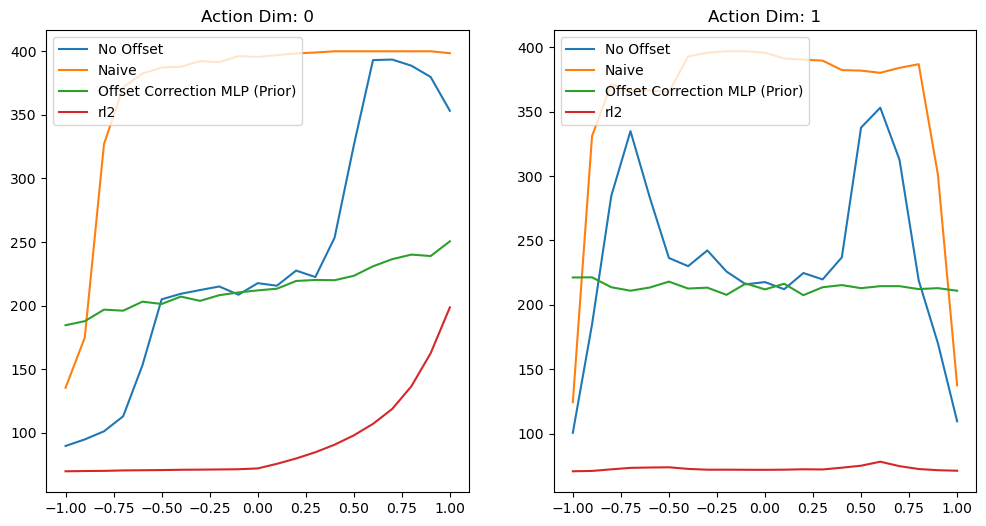

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
x = np.linspace(-max_action_offset, max_action_offset, num_tasks)
for i in range(2):
    for key in returns_and_lengths.keys():
        axs[i].plot(x, returns_and_lengths[key][i]["lengths"], label=key)
    axs[i].set_title(f"Action Dim: {i}")
    axs[i].legend()

### Plot Performance Profiles

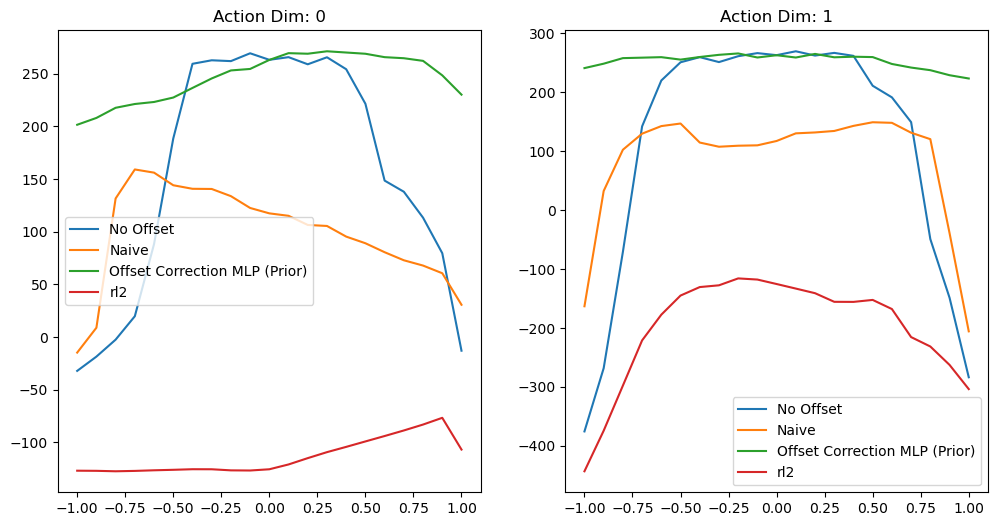

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
x = np.linspace(-max_action_offset, max_action_offset, num_tasks)
for i in range(2):
    for key in returns_and_lengths.keys():
        axs[i].plot(x, returns_and_lengths[key][i]["returns"], label=key)
    axs[i].set_title(f"Action Dim: {i}")
    axs[i].legend()

### Pretty plots

In [14]:
old_to_new_labels = {
    "No Offset": "DDPG trained without offsets",
    "Naive": "DDPG trained with offsets",
    # "Offset Correction MLP": "Explicit offset estimation",
    "Offset Correction MLP (Prior)": "Explicit offset estimation",
    # "Offset Correction MLP (Naive)": "Explicit offset estimation (Naive)",
    # "Offset Correction MLP (Prior)(Naive)": "Explicit offset estimation (Prior)(Naive)",
    # "Simplified PEARL": "End-to-end explicit offset estimation",
    # "PEARL": "PEARL",
    "rl2": "RL^2",
}
returns_and_lengths_pretty = {new_label: returns_and_lengths[old_label] for old_label,new_label in old_to_new_labels.items()}

In [15]:
with open('output/returns_and_lengths_pretty.pickle', 'wb') as handle:
    pickle.dump(returns_and_lengths_pretty, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('output/returns_and_lengths_pretty.pickle', 'rb') as handle:
    b = pickle.load(handle)
returns_and_lengths_pretty == b

True

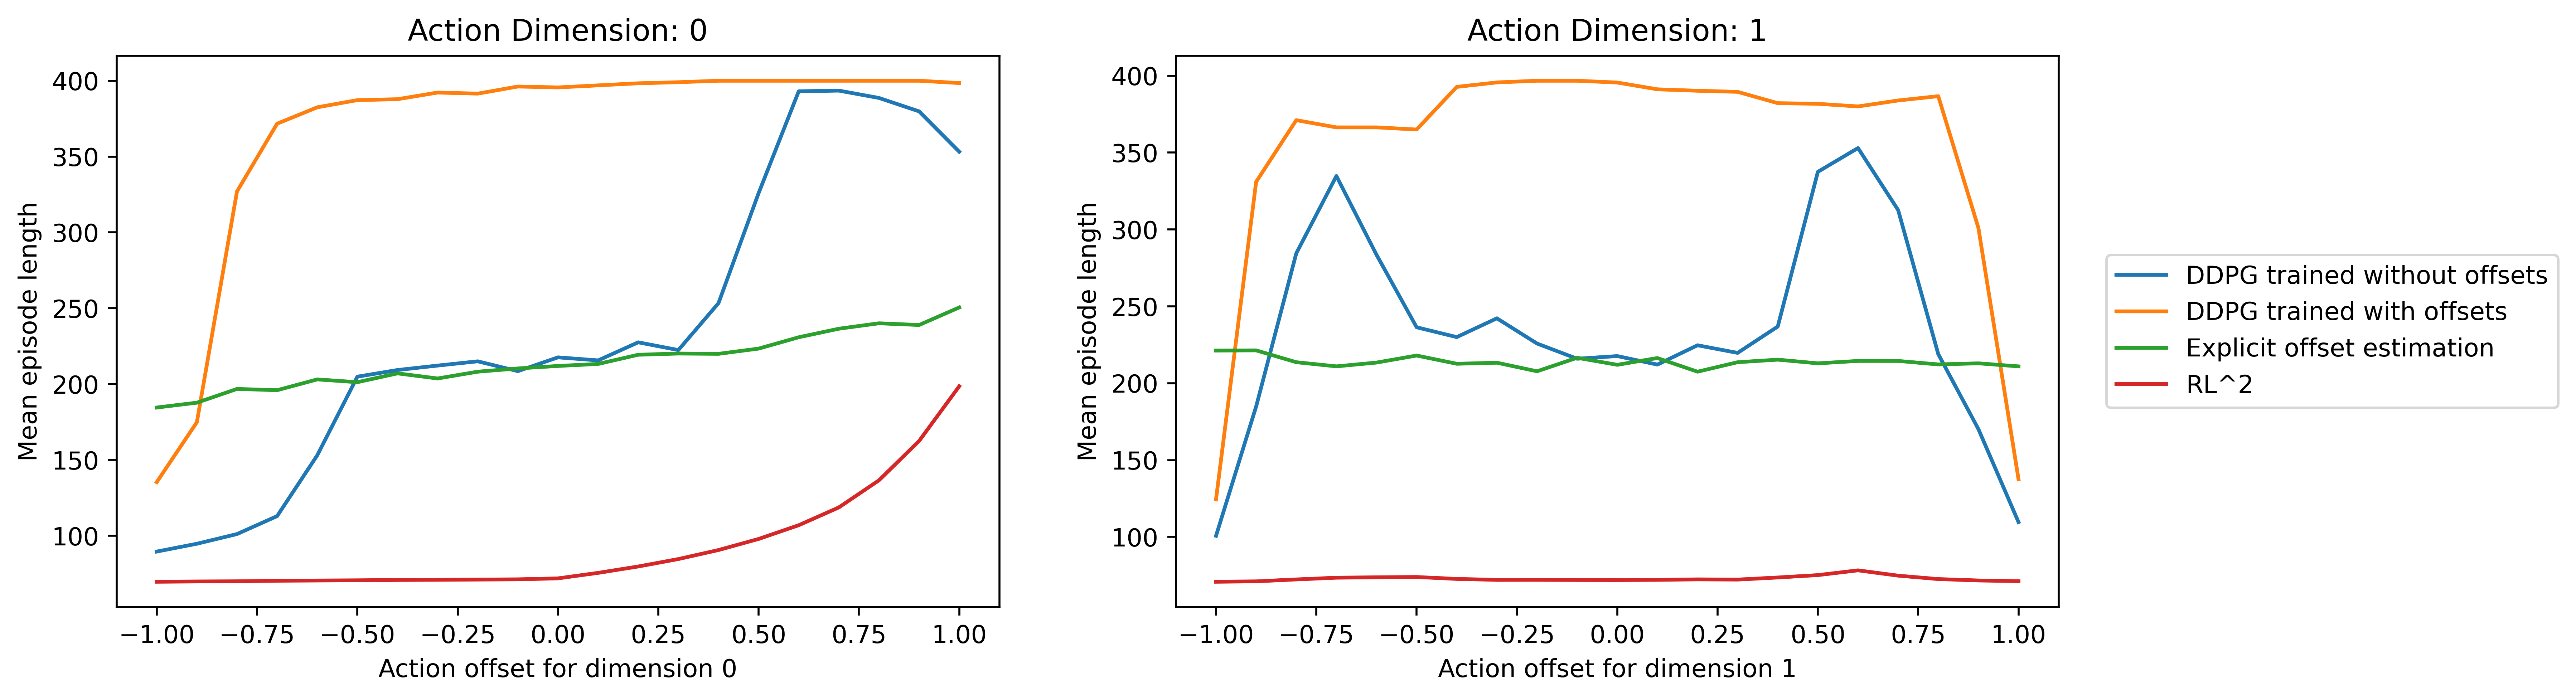

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14,4), dpi=500)
x = np.linspace(-max_action_offset, max_action_offset, num_tasks)
for i in range(2):
    for key in returns_and_lengths_pretty.keys():
        axs[i].plot(x, returns_and_lengths_pretty[key][i]["lengths"], label=key)
    # axs[i].plot(x, [returns_and_lengths_pretty["DDPG trained without offsets"][i]["lengths"][num_tasks//2]]*num_tasks, color='black', linestyle='dotted')
    axs[i].set_title(f"Action Dimension: {i}")
    axs[i].set_ylabel("Mean episode length")
    axs[i].set_xlabel(f"Action offset for dimension {i}")

axs[1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
None

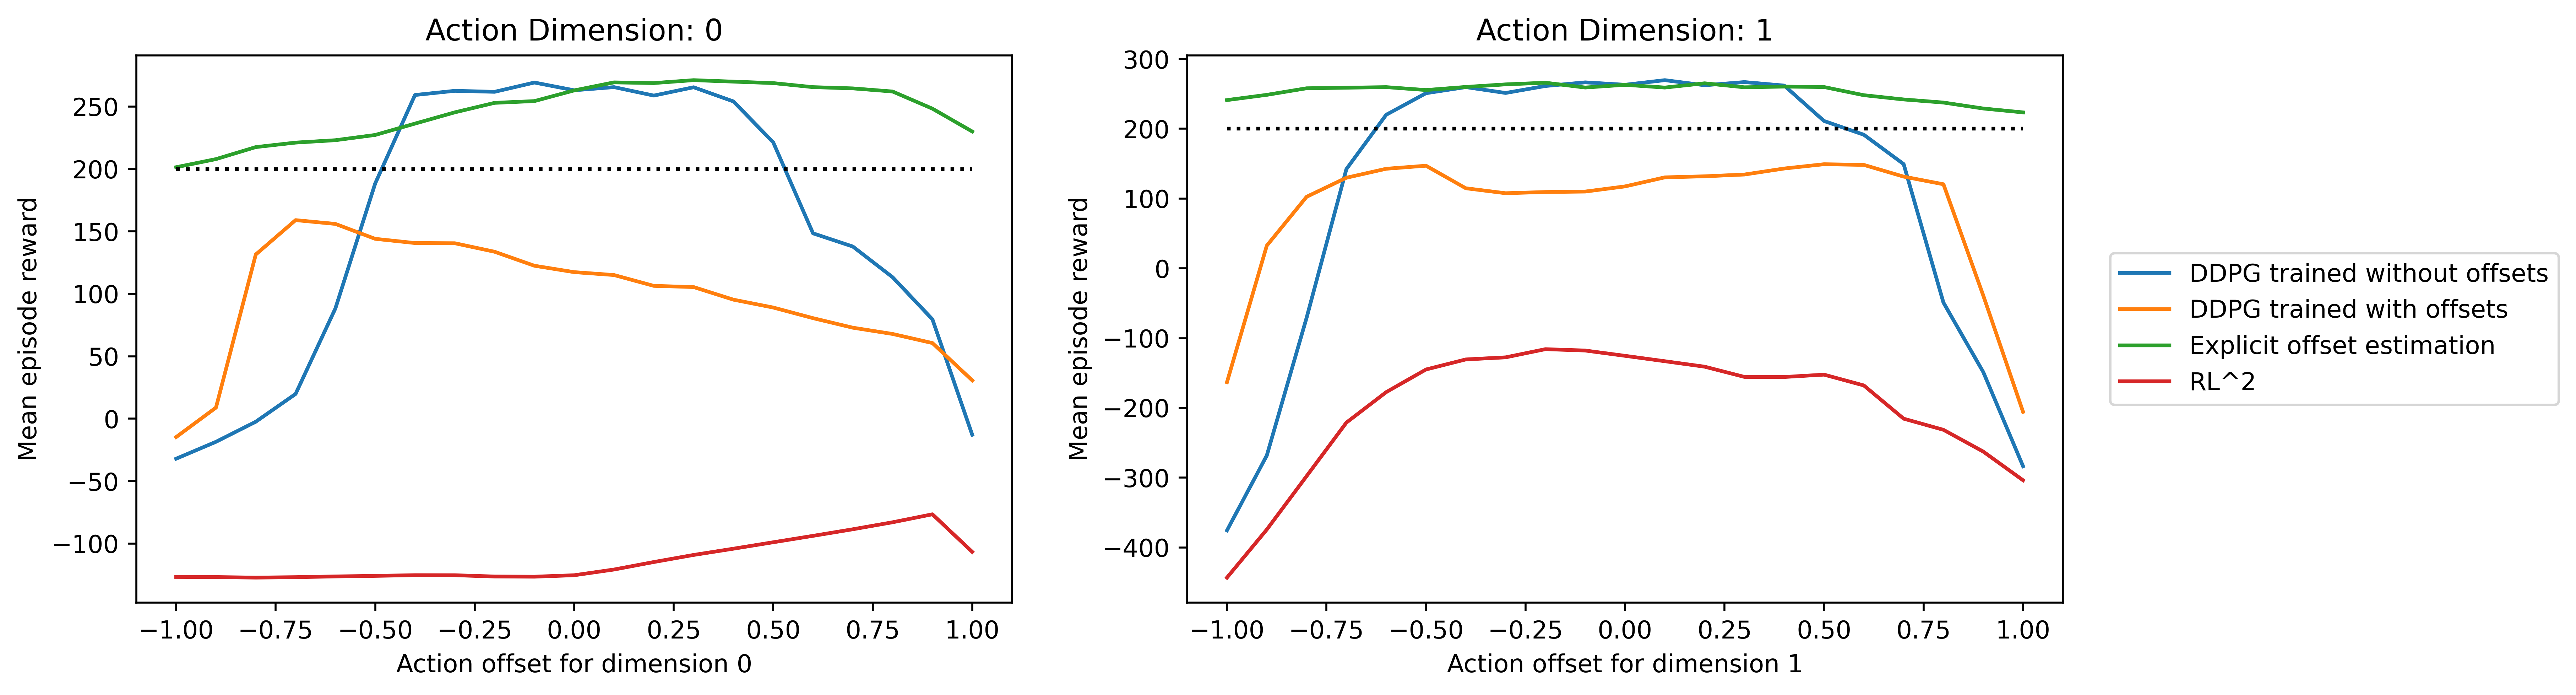

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14,4), dpi=500)
x = np.linspace(-max_action_offset, max_action_offset, num_tasks)
for i in range(2):
    for key in returns_and_lengths_pretty.keys():
        axs[i].plot(x, returns_and_lengths_pretty[key][i]["returns"], label=key)
    # axs[i].plot(x, [returns_and_lengths_pretty["DDPG trained without offsets"][i]["returns"][num_tasks//2]]*num_tasks, color='black', linestyle='dotted')
    axs[i].plot(x, [200]*num_tasks, color='black', linestyle='dotted')
    axs[i].set_title(f"Action Dimension: {i}")
    axs[i].set_ylabel("Mean episode reward")
    axs[i].set_xlabel(f"Action offset for dimension {i}")

axs[1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
None

#### Heatmaps for 2D evaluation

In [20]:
max_action_offset_2d = 1.0
num_tasks_2d = 11
num_episodes_2d = 100

def task_returns_2d(trainer):
    x, y = np.mgrid[-max_action_offset_2d:max_action_offset_2d:num_tasks_2d*1j,
                    -max_action_offset_2d:max_action_offset_2d:num_tasks_2d*1j]
    task_params = np.vstack((x.flatten(), y.flatten())).T
    
    task_trajs, _, _ = collect_trajectories(env, trainer.current_policy(), task_params, num_episodes_2d, eval=True)
    
    rewards = [
        np.mean([sum(traj.rewards) for traj in trajs])
        for trajs in task_trajs
    ]
    rewards = np.asarray(rewards).reshape((num_tasks_2d,num_tasks_2d))
    print("done")
    return rewards

In [21]:
returns_2d = {}

In [22]:
returns_2d.update({
    "DDPG trained without offsets": task_returns_2d(no_offset),
    "DDPG trained with offsets": task_returns_2d(naive),
    # "Explicit offset estimation": task_returns_2d(offset_mlp),
    "Explicit offset estimation": task_returns_2d(offset_mlp_prior),
})

done
done
done


In [23]:
# with open('output/returns_2d.pickle', 'wb') as handle:
#     pickle.dump(returns_2d, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('output/returns_2d.pickle', 'rb') as handle:
#     b = pickle.load(handle)
# all([np.allclose(returns_2d[k],b[k]) for k in returns_2d])

True

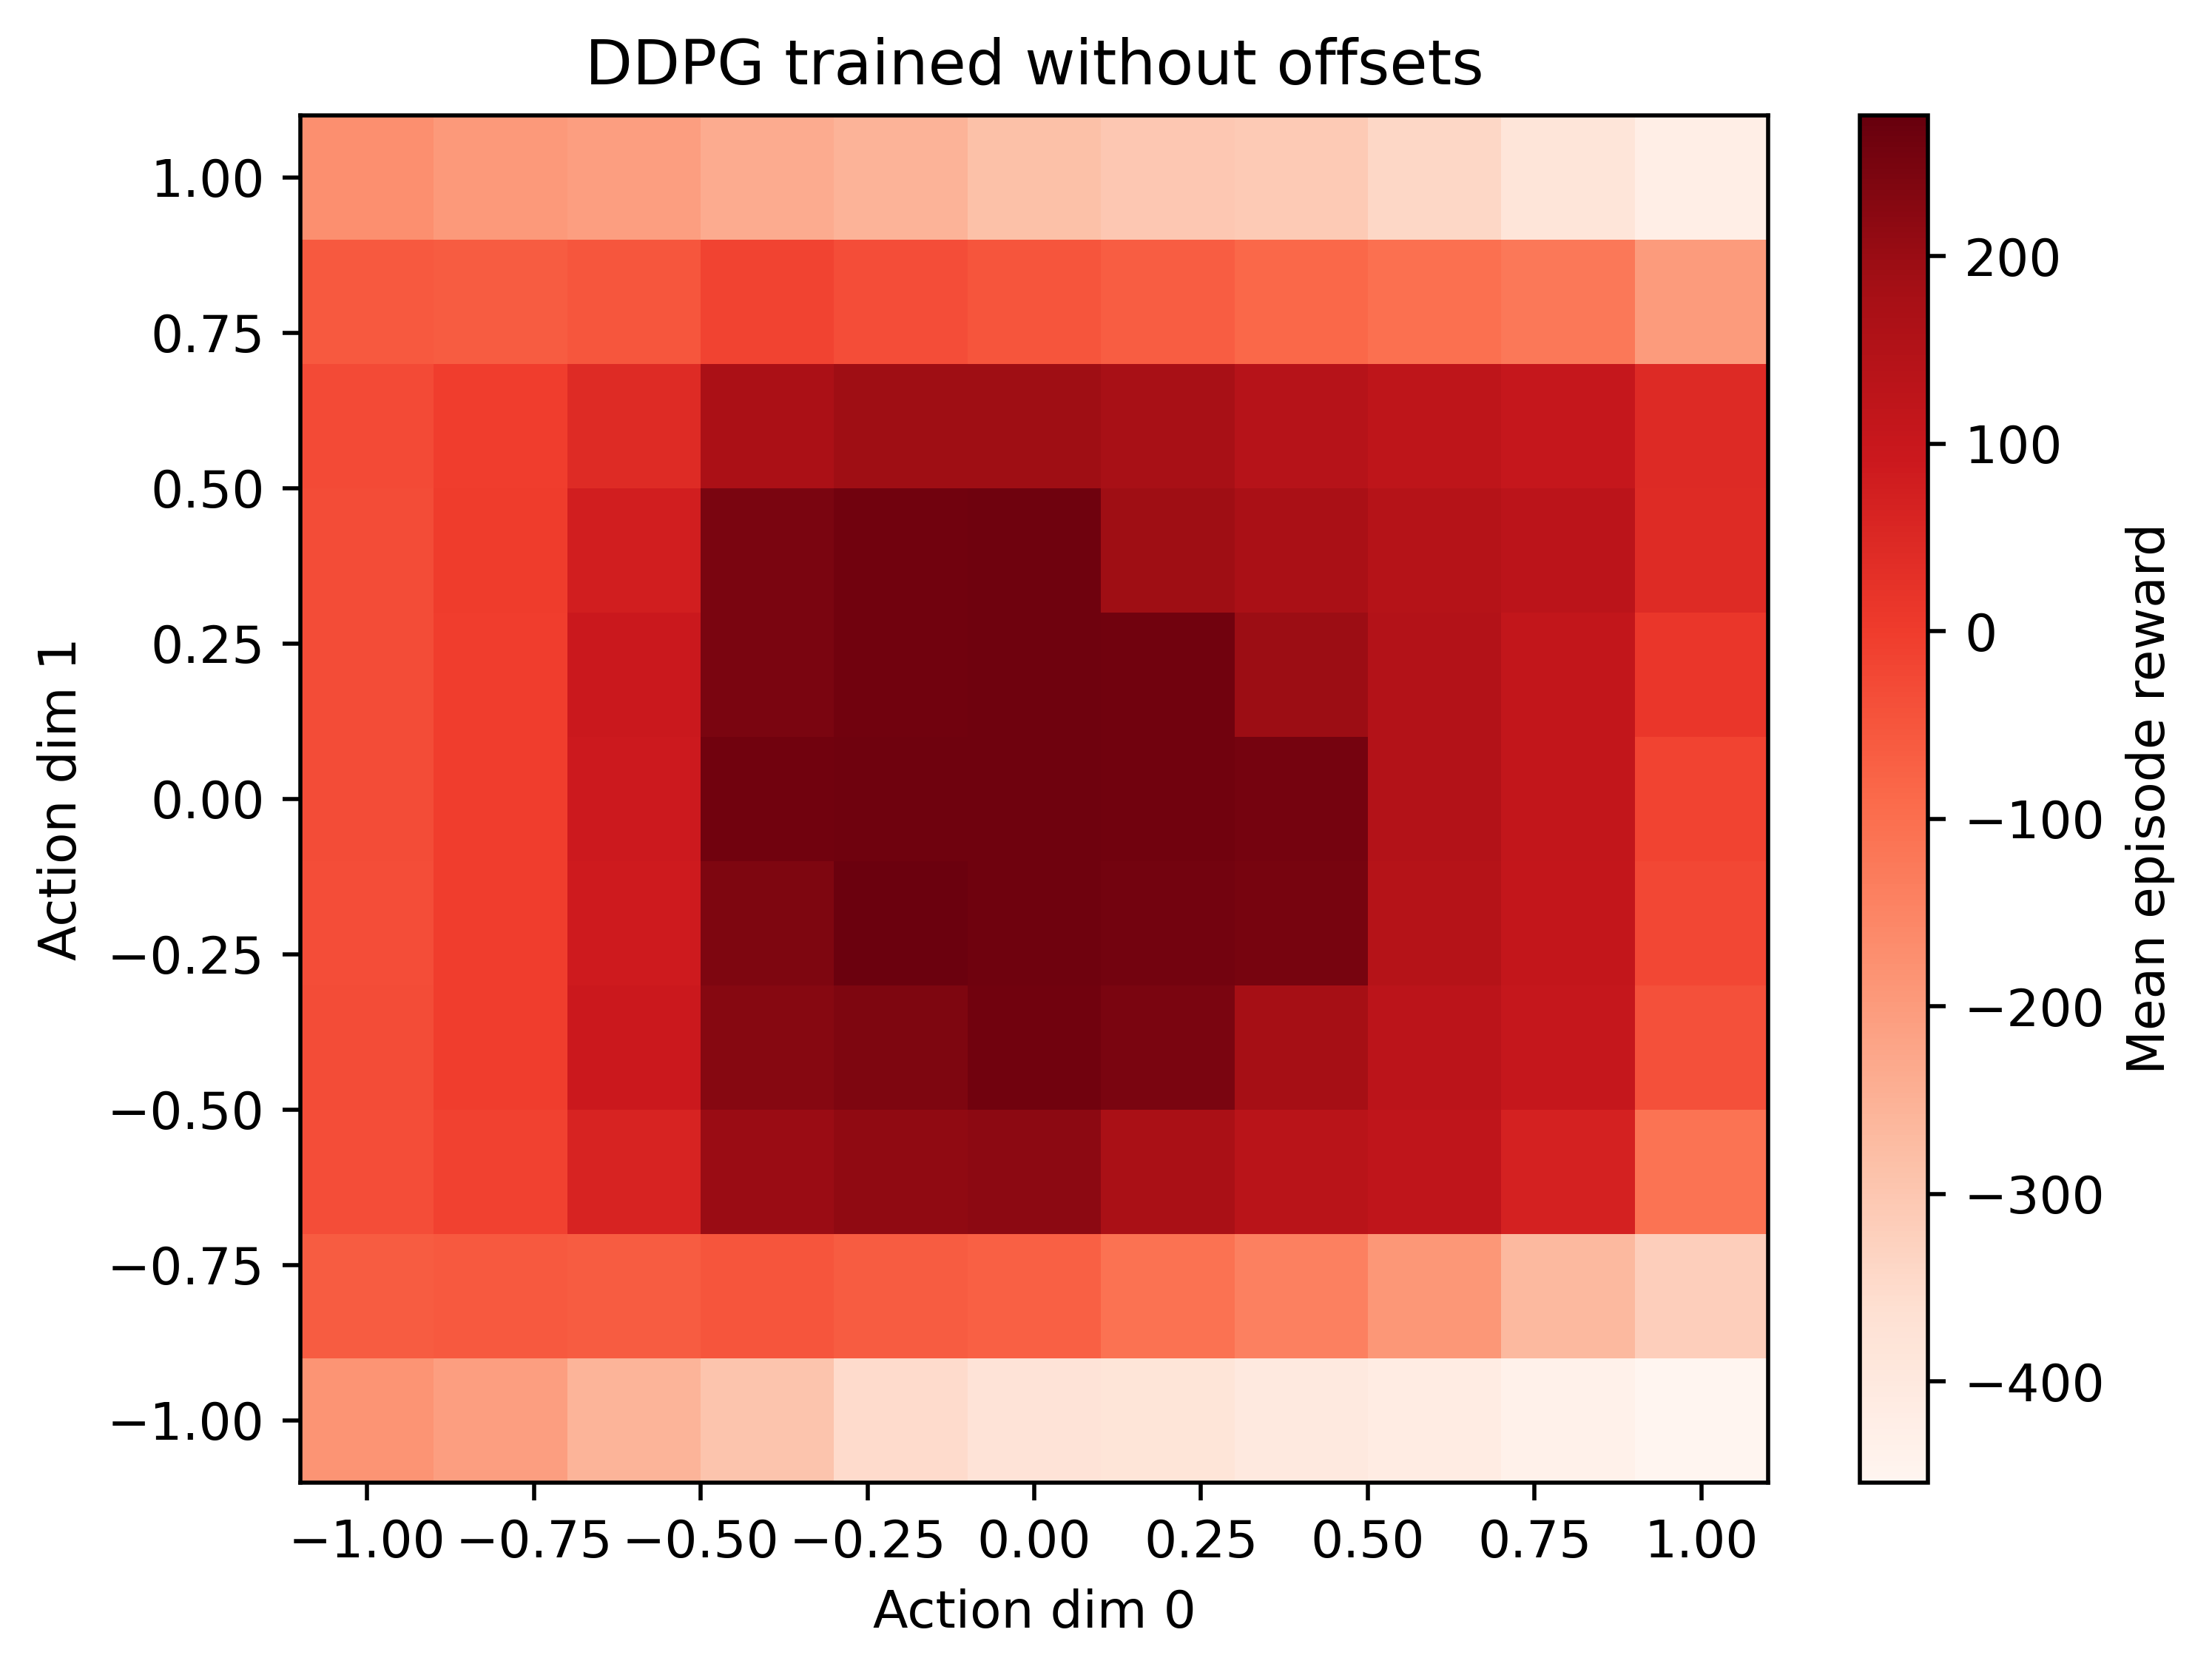

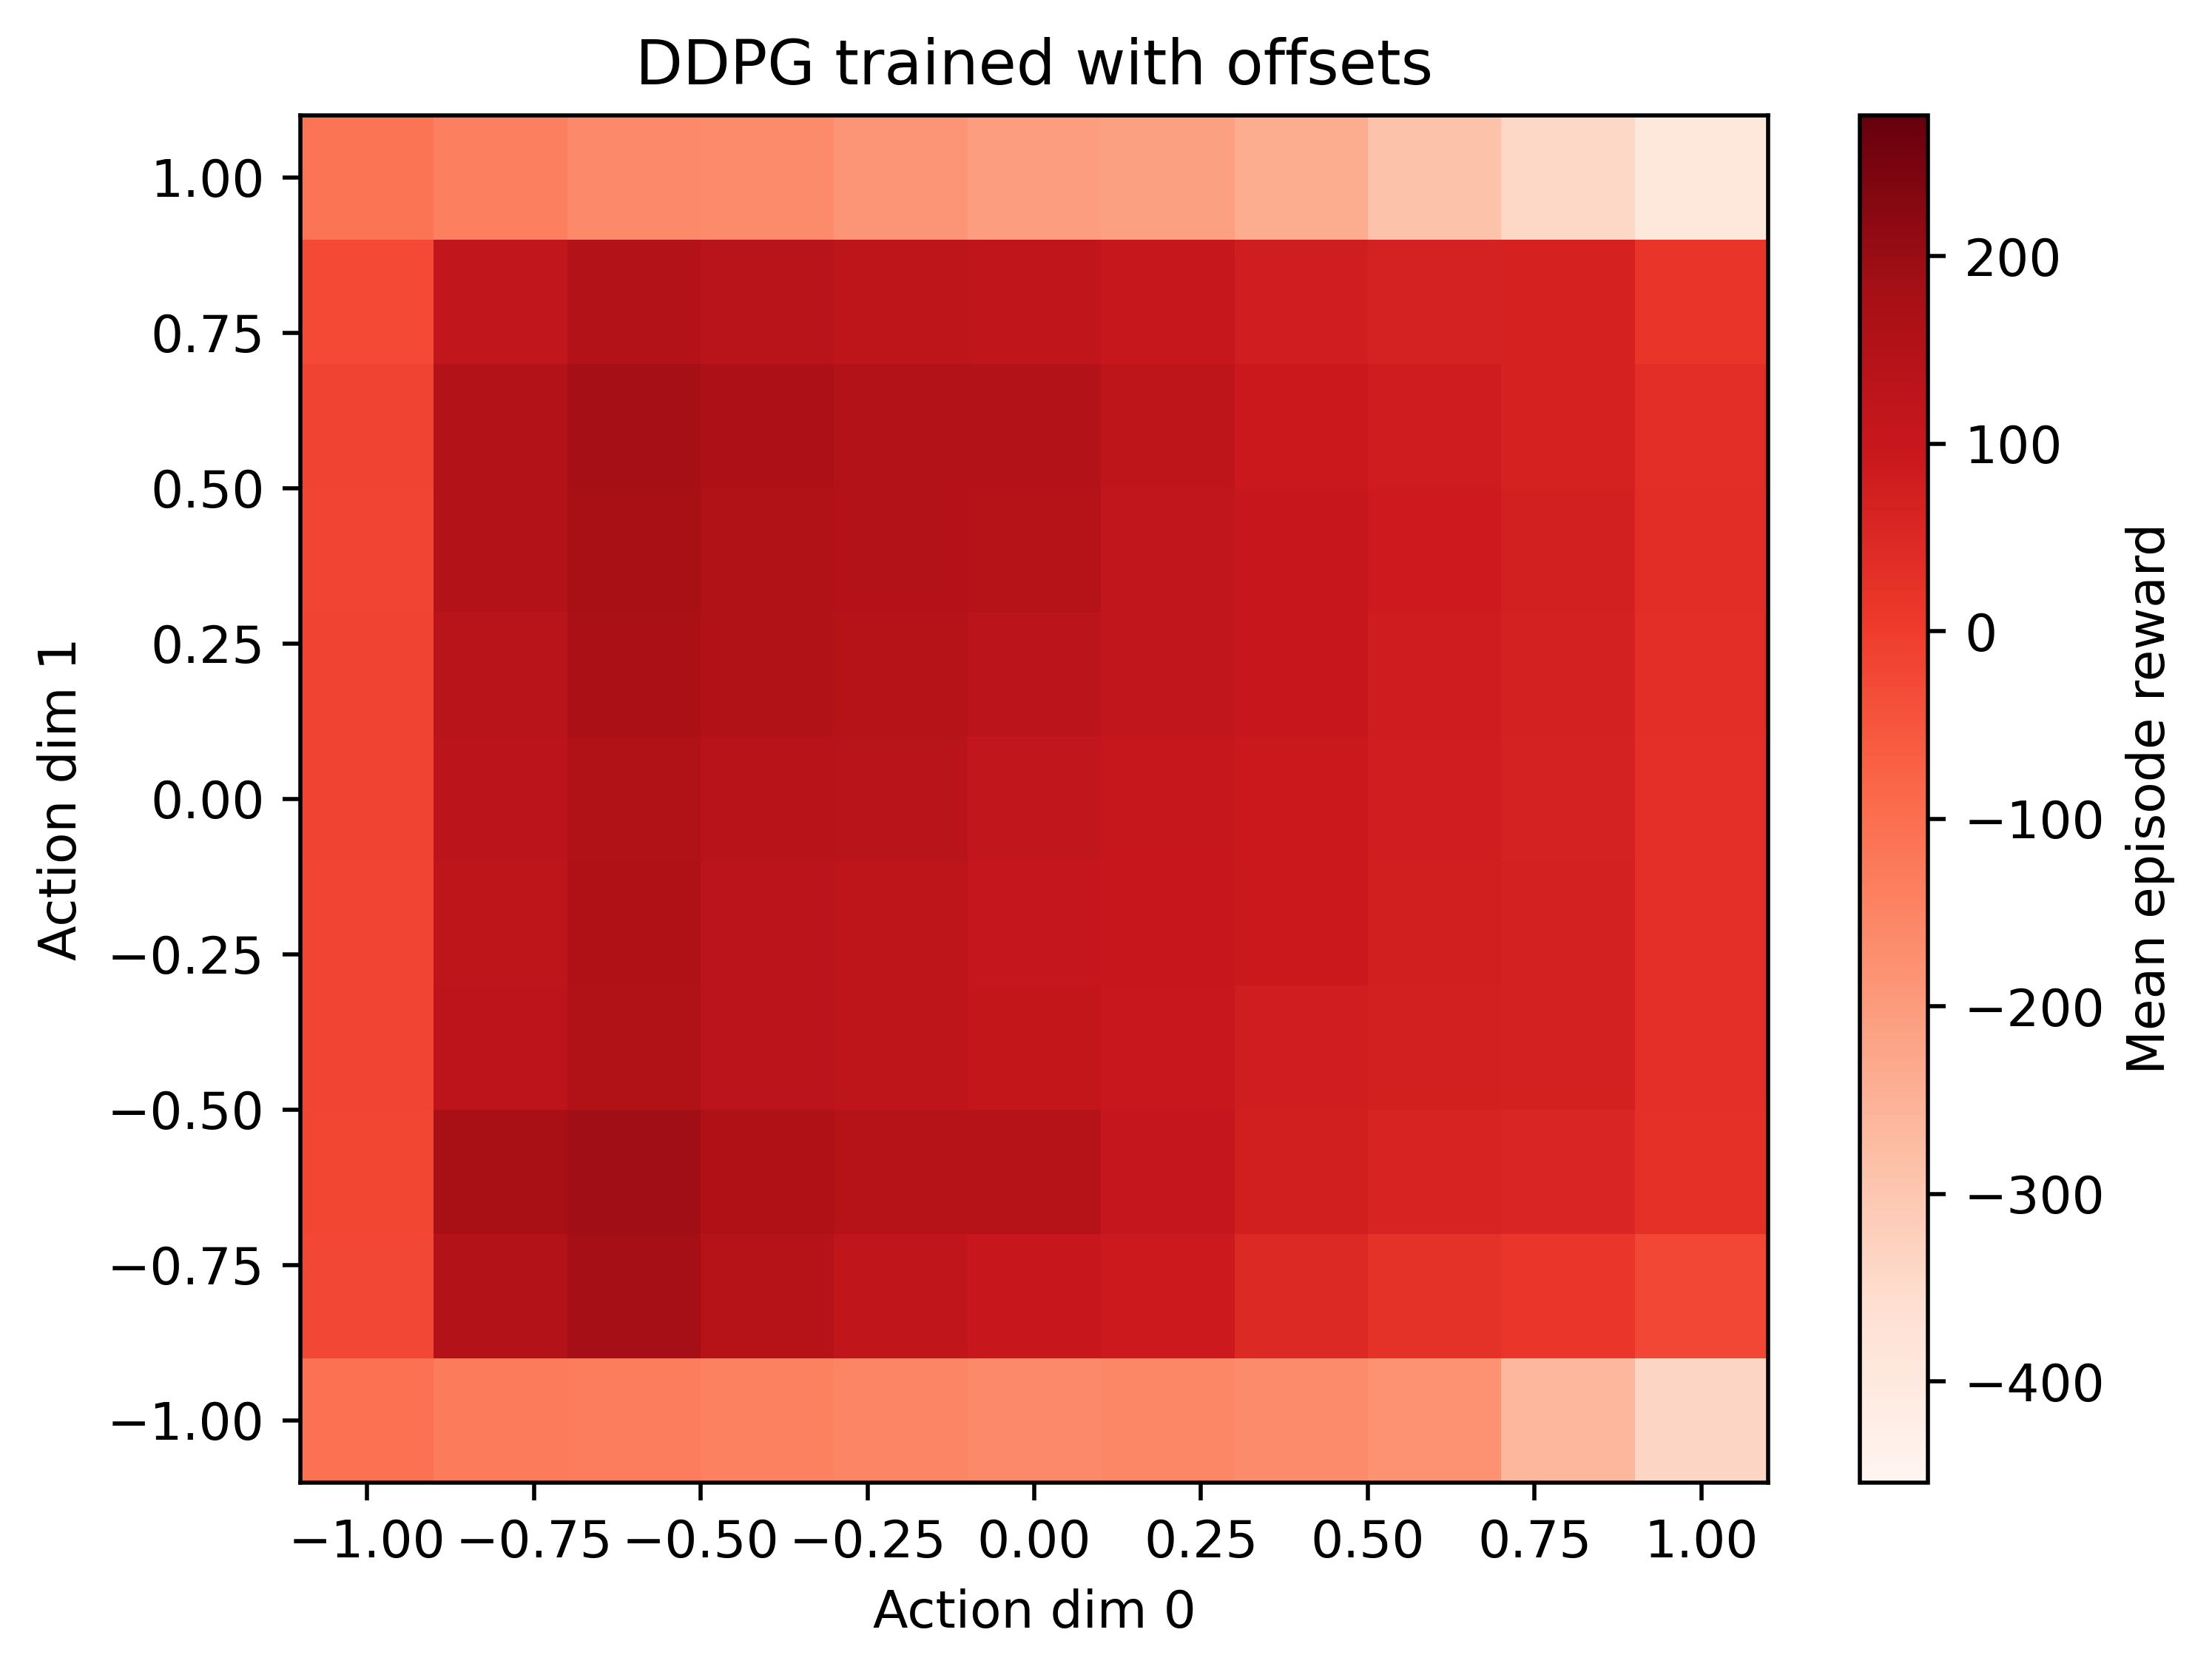

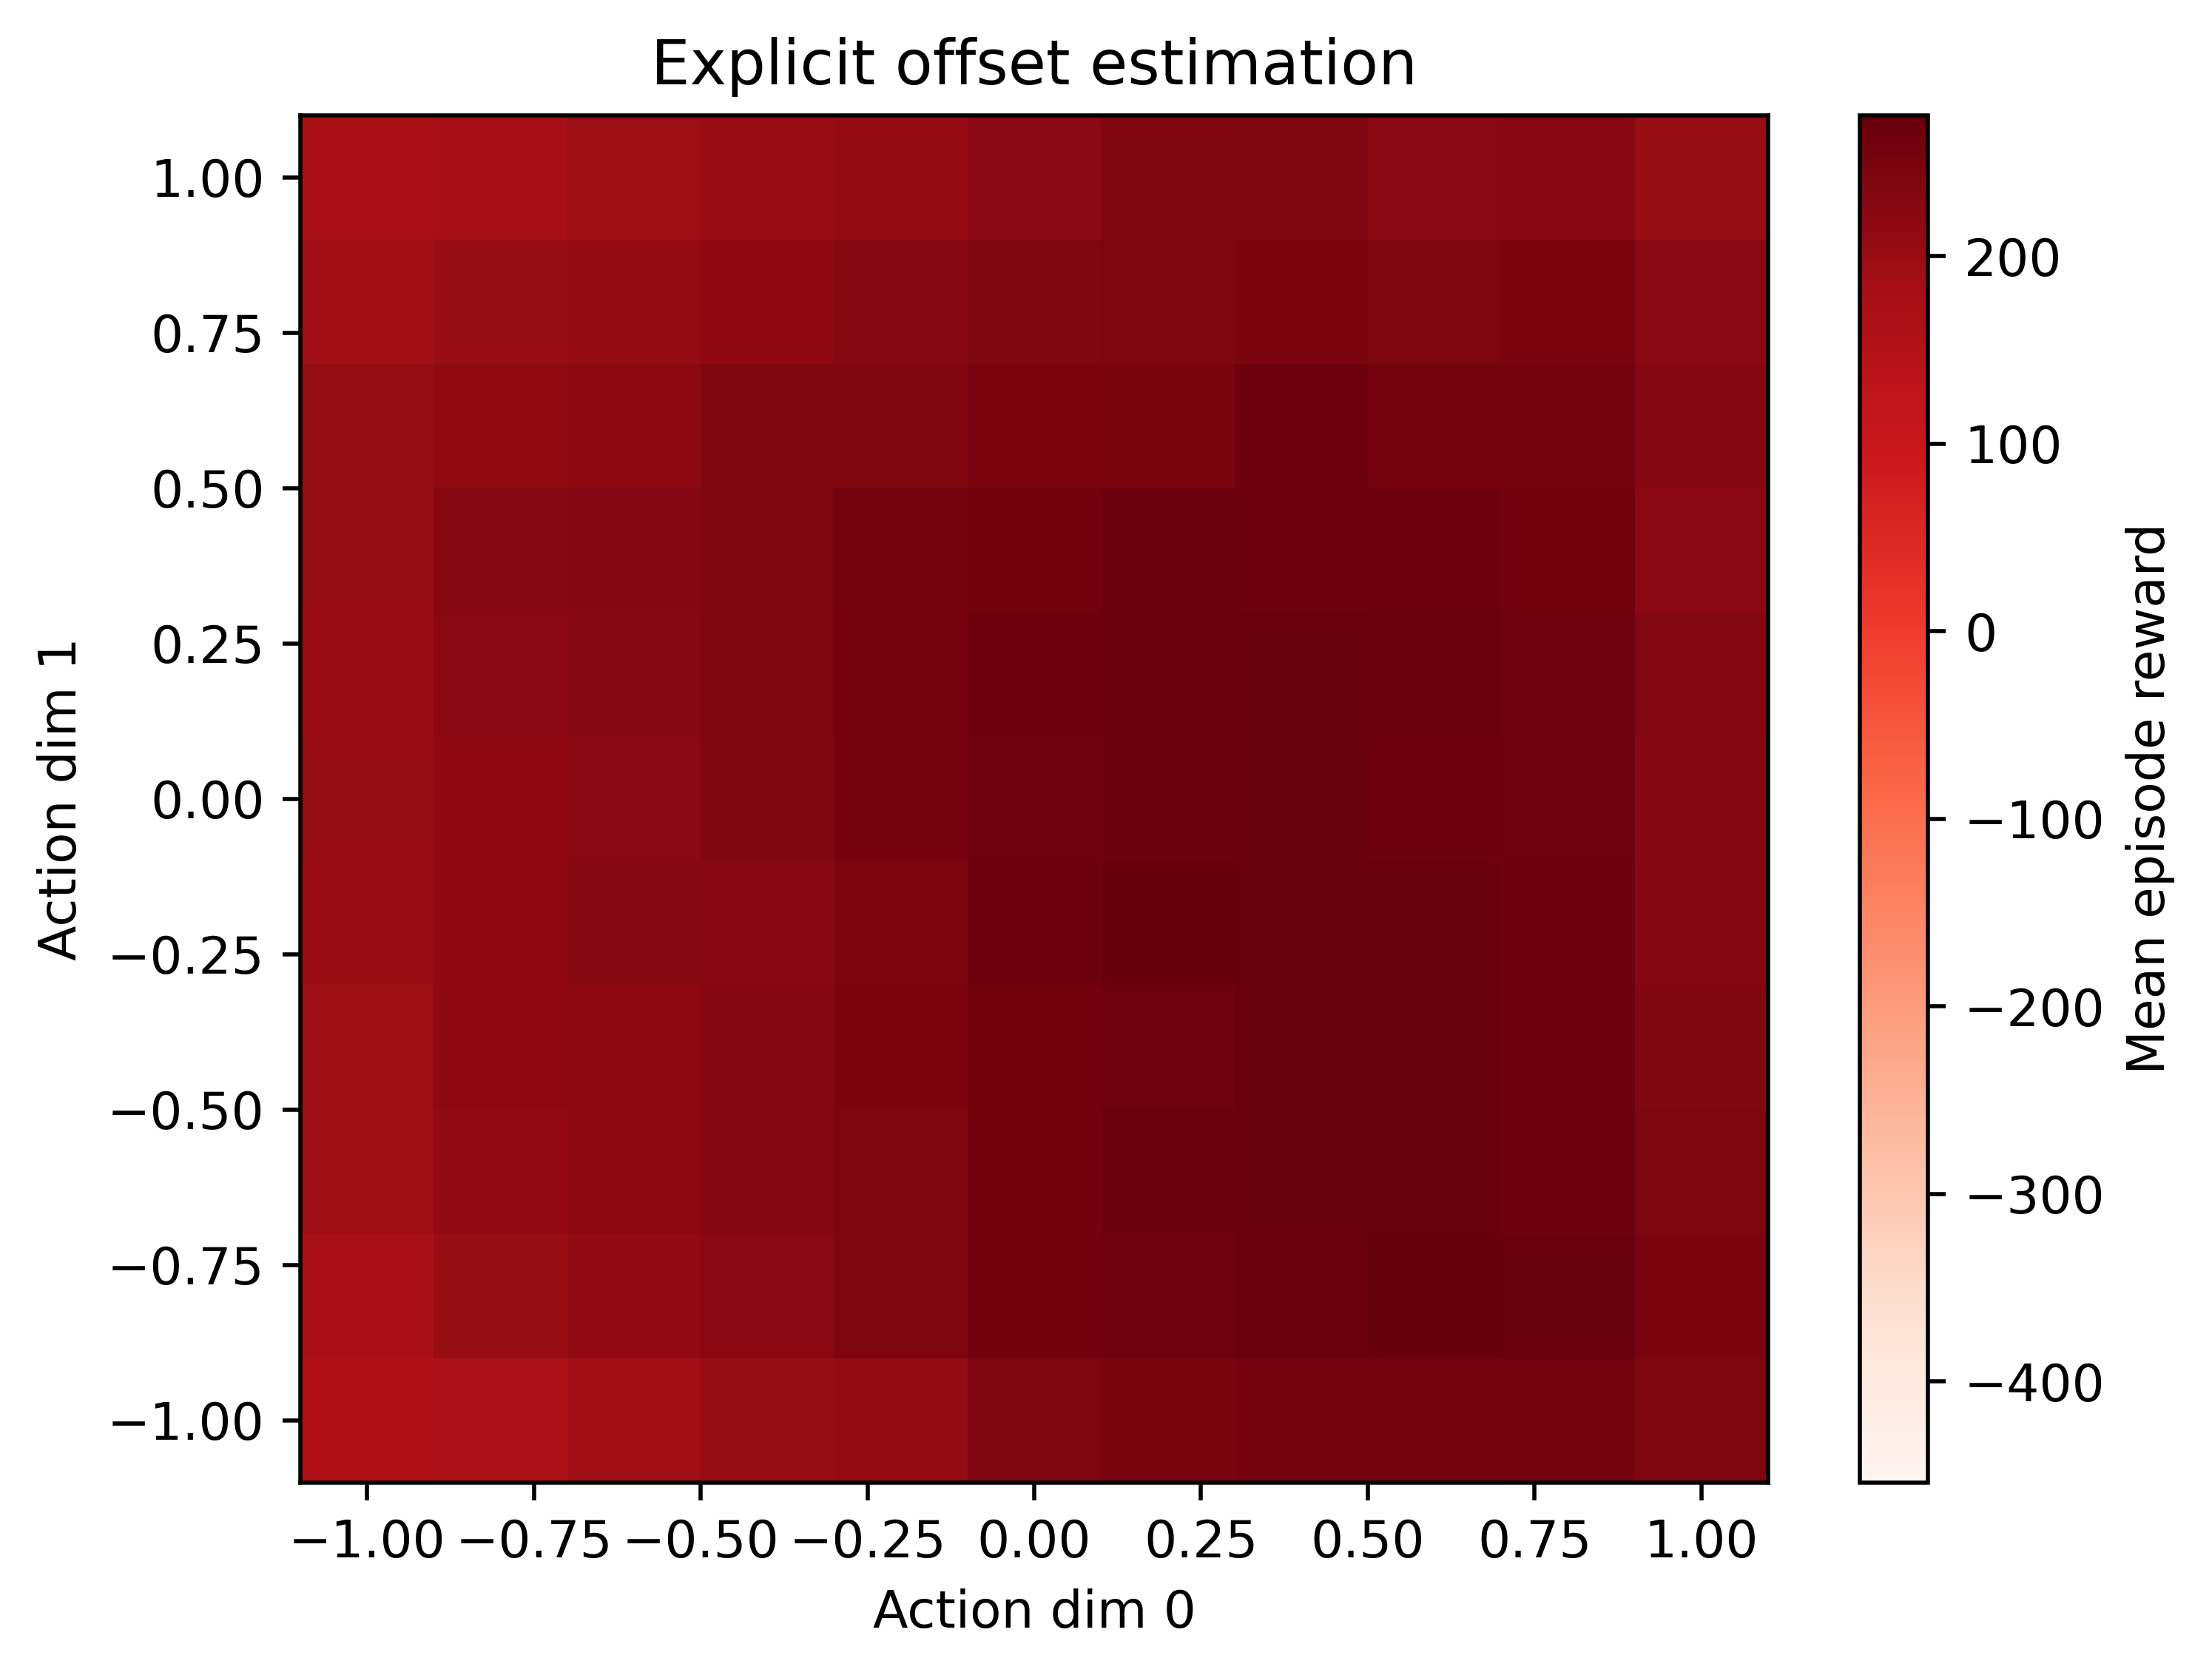

In [29]:
use_global_cbars = True
global_z_min = np.min(list(returns_2d.values()))
global_z_max = np.max(list(returns_2d.values()))

for name, z in returns_2d.items():
    max_offset_for_grid = max_action_offset_2d + (max_action_offset_2d/(num_tasks_2d-1))

    x, y = np.mgrid[-max_offset_for_grid:max_offset_for_grid:(num_tasks_2d+1)*1j,
                    -max_offset_for_grid:max_offset_for_grid:(num_tasks_2d+1)*1j]

    if use_global_cbars:
        z_min, z_max = global_z_min, global_z_max
    else:
        z_min, z_max = z.min(), z.max()

    fig, ax = plt.subplots(dpi=500)

    c = ax.pcolormesh(x, y, z, cmap='Reds', vmin=z_min, vmax=z_max)
    ax.set_title(name)
    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = fig.colorbar(c, ax=ax)
    cbar.set_label("Mean episode reward")

    ax.set_xlabel('Action dim 0')
    ax.set_ylabel('Action dim 1')

    plt.show()

### Save Replays at Max Offsets

In [10]:
from gymnasium.utils.save_video import save_video
def save_boundary_replays(trainer):
    task_params = np.zeros((4, 2))
    task_params[0, 0] = max_action_offset
    task_params[1, 0] = -max_action_offset
    task_params[2, 1] = max_action_offset
    task_params[3, 1] = -max_action_offset

    _, _, frames = collect_trajectories(env, trainer.current_policy(), task_params, 4, render=True)
    for i in range(len(task_params)):
        save_video(
            frames[i],
            "temp",
            episode_trigger=lambda x: True,
            fps=env.metadata["render_fps"],
            name_prefix=f"{trainer.__class__.__name__}.offset_{task_params[i, 0]:.2f}_{task_params[i, 1]:.2f}"
        )

In [11]:
save_boundary_replays(no_offset)
save_boundary_replays(naive)

Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_1.00_0.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_1.00_0.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_1.00_0.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_-1.00_0.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_-1.00_0.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_-1.00_0.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_1.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_1.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_1.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_-1.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_-1.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NoOffsetDDPG.offset_0.00_-1.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_1.00_0.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_1.00_0.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_1.00_0.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_-1.00_0.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_-1.00_0.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_-1.00_0.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_1.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_1.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_1.00-episode-0.mp4
Moviepy - Building video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_-1.00-episode-0.mp4.
Moviepy - Writing video d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_-1.00-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\OneDrive\code\Stanford\CS-238\Final Project\temp/NaiveDDPG.offset_0.00_-1.00-episode-0.mp4
